In [1]:
library(IRkernel)

In [2]:
library(jsonlite)

In [3]:
library(ggplot2)
library(ggpubr)

In [4]:
.libPaths()

[1] "/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library"

In [5]:
asd_genes <- read.table("/disk1/wenqing/tmp_data/ASD/102_ASD_genes.txt")$V1

In [6]:
sysnaptic_genes <- c("CYFIP2","FLNA","GABRA3","GRIA2","GRIA3","GRIA4","GRIK1","GRIK2","HTR2C","KCNA1")

In [7]:
length(setdiff(asd_genes,sysnaptic_genes))

[1] 101

In [29]:
get_shared_genes <- function(x){
    tmp <- intersect(rownames(x[[1]]),rownames(x[[2]]))
    tmp <- intersect(tmp,rownames(x[[3]]))
    tmp <- intersect(tmp,rownames(x[[4]]))
    tmp <- intersect(tmp,rownames(x[[5]]))
    tmp <- intersect(tmp,rownames(x[[6]]))
    return(tmp)
}
get_ei_mtx <- function(x){
    ei_1 <- x[[1]][shared_genes,]
    ei_2 <- x[[2]][shared_genes,]
    ei_3 <- x[[3]][shared_genes,]
    ei_4 <- x[[4]][shared_genes,]
    ei_5 <- x[[5]][shared_genes,]
    ei_6 <- x[[6]][shared_genes,]

    data <- as.data.frame(cbind(ei_1,ei_2,ei_3,ei_4,ei_5,ei_6))
    return(data)
}
get_de_gene_ei <- function(x){
    p_value <- t.test(x[1:3],x[4:6])$p.value
    return(p_value)
}
get_expr_change <- function(x){
    if(mean(x[1:3]) < mean(x[4:6])){
        flag <- 'down'
    }
    else if(mean(x[1:3]) > mean(x[4:6])){
        flag <- 'up'
    }
    return(flag)
}
get_fc_change <- function(x){
    tmp_fc <- log2(mean(x[1:3])/mean(x[4:6]))
    return(tmp_fc)
}

In [9]:
#############寻找能够代表细胞类型特异差异编辑的基因，并在二维图上可视化
gene_ei_L2_3 <- list()
for(sample in c("asd_male_pfc/AEI/17/","asd_male_pfc/AEI/18/","asd_male_pfc/AEI/57/","ctr_male_pfc/AEI/20/","ctr_male_pfc/AEI/32/","ctr_male_pfc/AEI/56/")){
    gene_ei_L2_3[[sample]] <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/",sample,"celltype_AEI/L2_3_ExN/regular_EI_inGene_over1.txt"))
}
gene_ei_L4 <- list()
for(sample in c("asd_male_pfc/AEI/17/","asd_male_pfc/AEI/18/","asd_male_pfc/AEI/57/","ctr_male_pfc/AEI/20/","ctr_male_pfc/AEI/32/","ctr_male_pfc/AEI/56/")){
    gene_ei_L4[[sample]] <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/",sample,"celltype_AEI/L4/regular_EI_inGene_over1.txt"))
}
gene_ei_L5_6 <- list()
for(sample in c("asd_male_pfc/AEI/17/","asd_male_pfc/AEI/18/","asd_male_pfc/AEI/57/","ctr_male_pfc/AEI/20/","ctr_male_pfc/AEI/32/","ctr_male_pfc/AEI/56/")){
    gene_ei_L5_6[[sample]] <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/",sample,"celltype_AEI/L5_6/regular_EI_inGene_over1.txt"))
}
gene_ei_L5_6_CC <- list()
for(sample in c("asd_male_pfc/AEI/17/","asd_male_pfc/AEI/18/","asd_male_pfc/AEI/57/","ctr_male_pfc/AEI/20/","ctr_male_pfc/AEI/32/","ctr_male_pfc/AEI/56/")){
    gene_ei_L5_6_CC[[sample]] <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/",sample,"celltype_AEI/L5_6_CC/regular_EI_inGene_over1.txt"))
}
gene_ei_IN_VIP <- list()
for(sample in c("asd_male_pfc/AEI/17/","asd_male_pfc/AEI/18/","asd_male_pfc/AEI/57/","ctr_male_pfc/AEI/20/","ctr_male_pfc/AEI/32/","ctr_male_pfc/AEI/56/")){
    gene_ei_IN_VIP[[sample]] <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/",sample,"celltype_AEI/IN_VIP/regular_EI_inGene_over1.txt"))
}
gene_ei_Olig <- list()
for(sample in c("asd_male_pfc/AEI/17/","asd_male_pfc/AEI/18/","asd_male_pfc/AEI/57/","ctr_male_pfc/AEI/20/","ctr_male_pfc/AEI/32/","ctr_male_pfc/AEI/56/")){
    gene_ei_Olig[[sample]] <- read.table(paste0("/disk1/wenqing/tmp_data/ASD/",sample,"celltype_AEI/Olig/regular_EI_inGene_over1.txt"))
}


In [123]:
shared_genes <- get_shared_genes(gene_ei_Olig)
ei_data <- get_ei_mtx(gene_ei_Olig)
ei_wzSig <- apply(ei_data,1,get_de_gene_ei)
table(ei_wzSig < 0.05)
fc <- apply(ei_data,1,get_fc_change)

#head(ei_data)
expr_change <- c()
for(i in 1:nrow(ei_data)){
    if(ei_wzSig[i] < 0.05 & fc[i] < -1){
        tmp_change <- 'down'
    }else if(ei_wzSig[i] < 0.05 & fc[i] > 1){
        tmp_change <- 'up'
    }else{
        tmp_change <- 'noSig'
    }
    expr_change <- c(expr_change,tmp_change)
}


FALSE  TRUE 
 2106    57 

In [124]:
table(expr_change)

expr_change
 down noSig    up 
   43  2113     7 

In [125]:
#######每种细胞类型editing level有显著变化的基因 &&& asd vs ctr的变换
#火山图
volcano_dat <- as.data.frame(cbind(ei_wzSig,fc,expr_change))
rownames(volcano_dat) <- shared_genes  
colnames(volcano_dat) <- c("p_value","fold_change","relative_ei_change")

volcano_dat$fold_change <- as.numeric(volcano_dat$fold_change)
volcano_dat$p_value <- as.numeric(volcano_dat$p_value)

asd_ctr_ei_down_genes <- rownames(volcano_dat)[volcano_dat$relative_ei_change=='down']
asd_ctr_ei_up_genes <- rownames(volcano_dat)[volcano_dat$relative_ei_change=='up']


write.table(asd_ctr_ei_down_genes,"/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L2_3_down.txt")
write.table(asd_ctr_ei_up_genes,"/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L2_3_up.txt")


In [126]:
asd_ctr_ei_noChange_genes <- rownames(volcano_dat)[volcano_dat$relative_ei_change=='noSig']
#write.table(asd_ctr_ei_noChange_genes,"/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/Olig_noSig.txt")

In [127]:
volcano_dat[intersect(asd_ctr_ei_up_genes,asd_genes),]
volcano_dat[intersect(asd_ctr_ei_down_genes,asd_genes),]
volcano_dat[intersect(asd_ctr_ei_up_genes,sysnaptic_genes),]
volcano_dat[intersect(asd_ctr_ei_down_genes,sysnaptic_genes),]


p_value,fold_change,relative_ei_change
<dbl>,<dbl>,<chr>


p_value,fold_change,relative_ei_change
<dbl>,<dbl>,<chr>


p_value,fold_change,relative_ei_change
<dbl>,<dbl>,<chr>


p_value,fold_change,relative_ei_change
<dbl>,<dbl>,<chr>


In [132]:
p6 <- ggplot(volcano_dat, aes(x=fold_change, y=-log2(p_value))) +
  geom_point(alpha=0.4, size=2,aes(colour = relative_ei_change)) +
  geom_hline(yintercept=-log2(0.05),linetype=2)+        # 在图上添加虚线
  geom_vline(xintercept=c(-1,1),linetype=2)+ 
  scale_colour_manual(values = c("down"= "blue", "up"="red",  "noSig"= "grey"))+
  theme(legend.position = "none") +
  theme_bw()+ ggtitle('') +
  xlim(c(-5, 5)) + ylim(c(0, 15)) +
  xlab("log2(fold_change)") + ylab("-log2(p.value)")+
    ggtitle("Oligdendrocyte") +
  theme(plot.title = element_text(vjust = -10)) +
  theme(plot.title = element_text(hjust = 0.5))
  
 

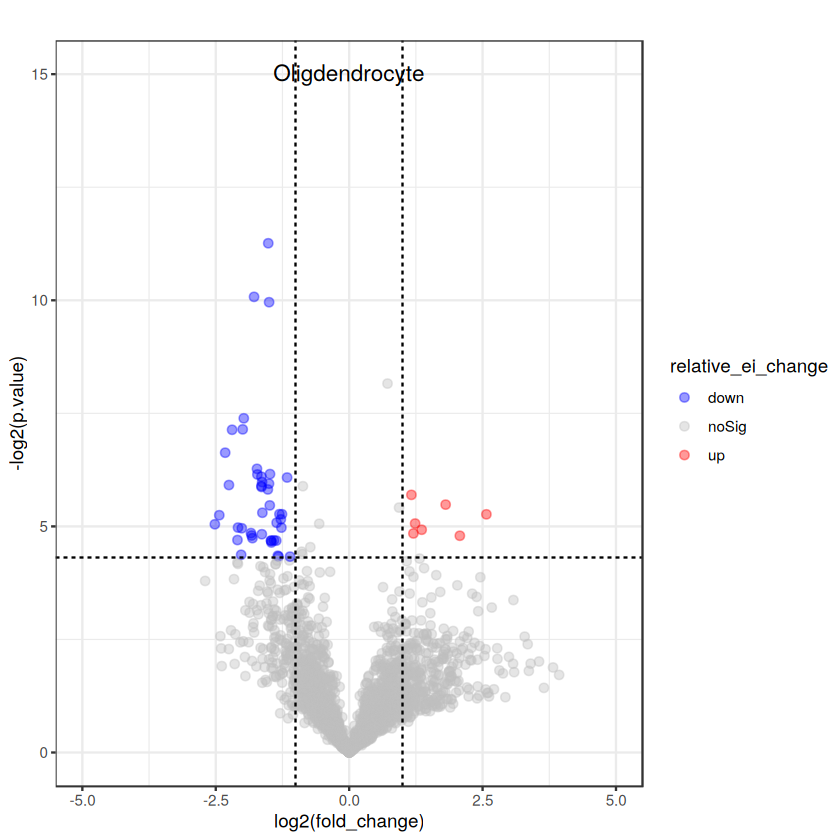

In [133]:
p6

In [121]:
p5 <- ggplot(volcano_dat, aes(x=fold_change, y=-log2(p_value))) +
  geom_point(alpha=0.4, size=2,aes(colour = relative_ei_change)) +
  geom_hline(yintercept=-log2(0.05),linetype=2)+        # 在图上添加虚线
  geom_vline(xintercept=c(-1,1),linetype=2)+ 
  scale_colour_manual(values = c("down"= "blue", "up"="red",  "noSig"= "grey"))+
  theme(legend.position = "none") +
  theme_bw()+ ggtitle('') +
  xlim(c(-5,5)) + ylim(c(0, 15)) +
  xlab("log2(fold_change)") + ylab("-log2(p.value)") +
  geom_point(aes(-1.240076,-log2(0.02031865)),color='black')+
  geom_text(aes(-1.240076,-log2(0.02031865),label='SPAST'),color='black',hjust=1.5,vjust=0.5)+
  geom_point(aes(-1.490831	,-log2(0.03371695)),color='black')+
  geom_text(aes(-1.490831,-log2(0.03371695),label='ZMYND8'),color='black',hjust=1.5,vjust=-0.5)+
  ggtitle("VIP interneurons") +
  theme(plot.title = element_text(vjust = -10)) +
  theme(plot.title = element_text(hjust = 0.5))
 



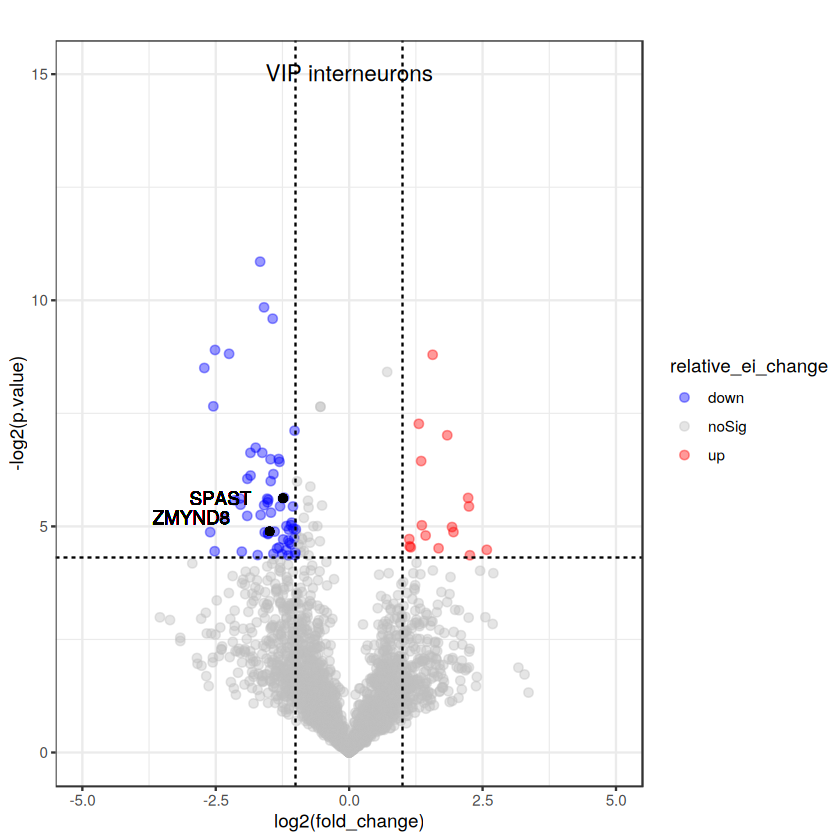

In [122]:
p5

In [112]:
p4 <- ggplot(volcano_dat, aes(x=fold_change, y=-log2(p_value))) +
  geom_point(alpha=0.4, size=2,aes(colour = relative_ei_change)) +
  geom_hline(yintercept=-log2(0.05),linetype=2)+        # 在图上添加虚线
  geom_vline(xintercept=c(-1,1),linetype=2)+ 
  scale_colour_manual(values = c("down"= "blue", "up"="red",  "noSig"= "grey"))+
  theme(legend.position = "none") +
  theme_bw()+ ggtitle('') +
  xlim(c(-5,5)) + ylim(c(0, 15)) +
  xlab("log2(fold_change)") + ylab("-log2(p.value)") +
  ggtitle("Layer 5/6 cortico-cortical projection neurons") +
  theme(plot.title = element_text(vjust = -10)) +
  theme(plot.title = element_text(hjust = 0.5))
  
 

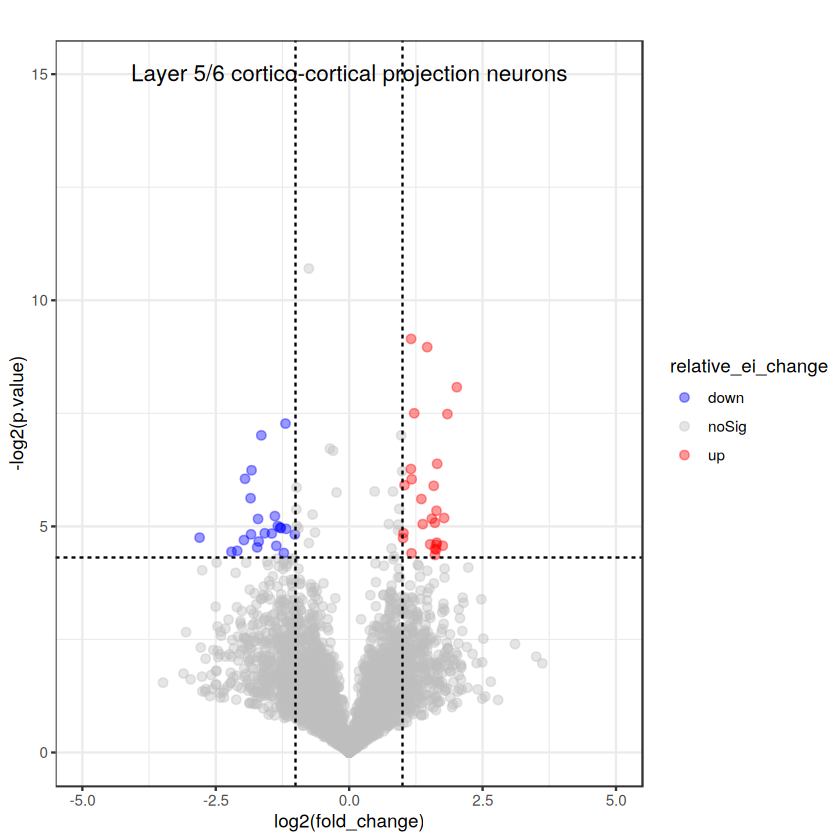

In [113]:
p4

In [93]:
p3 <- ggplot(volcano_dat, aes(x=fold_change, y=-log2(p_value))) +
  geom_point(alpha=0.4, size=2,aes(colour = relative_ei_change)) +
  geom_hline(yintercept=-log2(0.05),linetype=2)+        # 在图上添加虚线
  geom_vline(xintercept=c(-1,1),linetype=2)+ 
  scale_colour_manual(values = c("down"= "blue", "up"="red",  "noSig"= "grey"))+
  theme(legend.position = "none") +
  theme_bw()+ ggtitle('') +
  xlim(c(-5, 5)) + ylim(c(0, 15)) +
  xlab("log2(fold_change)") + ylab("-log2(p.value)")+
  ggtitle("Layer 5/6 corticofugal projection neurons") +
  theme(plot.title = element_text(vjust = -10)) +
  theme(plot.title = element_text(hjust = 0.5))
  
 

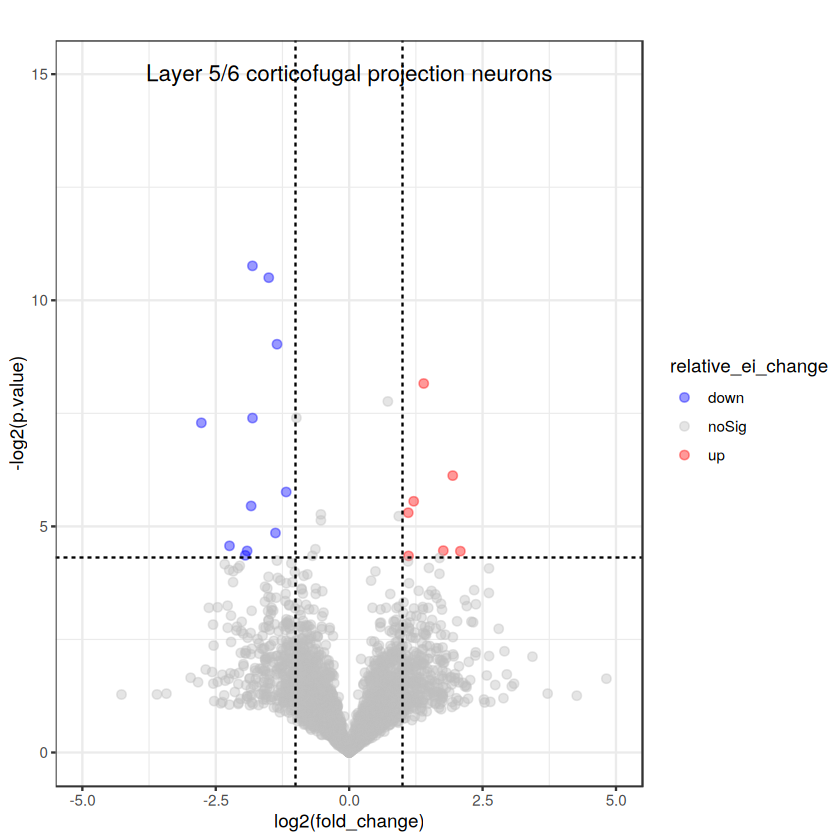

In [94]:
p3

In [86]:
p2 <- ggplot(volcano_dat, aes(x=fold_change, y=-log2(p_value))) +
  geom_point(alpha=0.4, size=2,aes(colour = relative_ei_change)) +
  geom_hline(yintercept=-log2(0.05),linetype=2)+        # 在图上添加虚线
  geom_vline(xintercept=c(-1,1),linetype=2)+ 
  scale_colour_manual(values = c("down"= "blue", "up"="red",  "noSig"= "grey"))+
  theme(legend.position = "none") +
  theme_bw()+ ggtitle('') +
  xlim(c(-5, 5)) + ylim(c(0, 15)) +
  xlab("log2(fold_change)") + ylab("-log2(p.value)") +
  geom_point(aes(-1.597026,-log2(0.03518955)),color='black')+
  geom_text(aes(-1.597026,-log2(0.03518955),label='GRIN2B'),color='black',hjust=1.5,vjust=0.5)+
  geom_point(aes(-1.254673,-log2(0.03193491)),color='black')+
  geom_text(aes(-1.254673,-log2(0.03193491),label='KDM5B'),color='black',hjust=1.5,vjust=-0.5)+
  ggtitle("Layer 4 excitory neurons") +
  theme(plot.title = element_text(vjust = -10)) +
  theme(plot.title = element_text(hjust = 0.5))
  
 

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


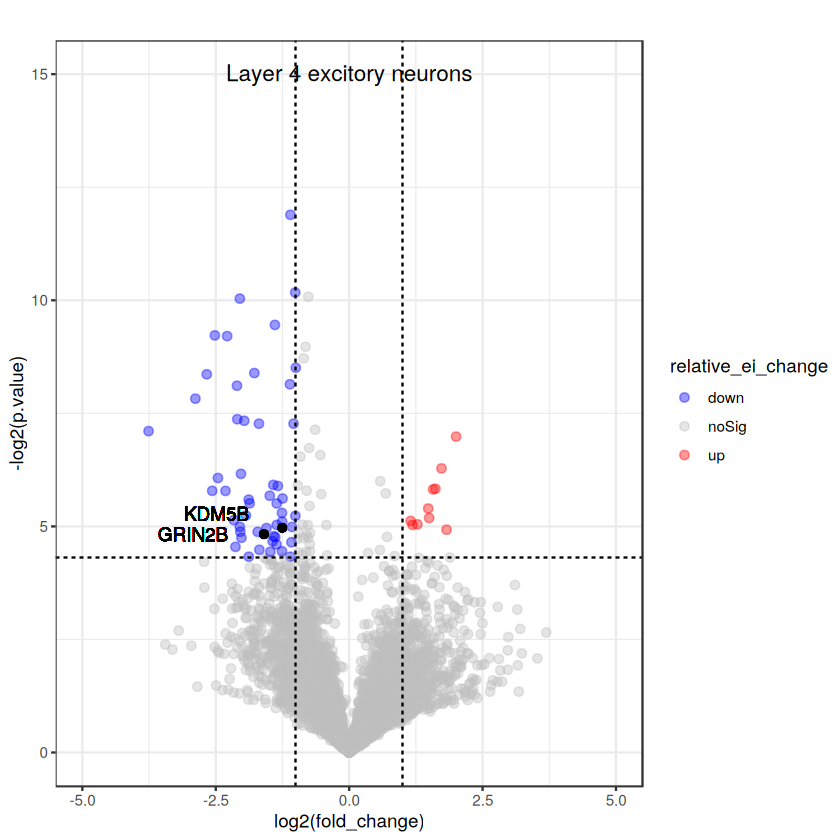

In [87]:
p2

In [75]:
p1 <- ggplot(volcano_dat, aes(x=fold_change, y=-log2(p_value))) +
  geom_point(alpha=0.4, size=2,aes(colour = relative_ei_change)) +
  geom_hline(yintercept=-log2(0.05),linetype=2)+        # 在图上添加虚线
  geom_vline(xintercept=c(-1,1),linetype=2)+ 
  scale_colour_manual(values = c("down"= "blue", "up"="red",  "noSig"= "grey"))+
  theme(legend.position = "none") +
  theme_bw()+ ggtitle('') +
  xlim(c(-5, 5)) + ylim(c(0, 15)) +
  xlab("log2(fold_change)") + ylab("-log2(p.value)") +
  geom_point(aes(-1.488085,-log2(0.02031865)),color='black')+
  geom_text(aes(-1.488085,-log2(0.02031865),label='GNAI1'),color='black',hjust=1.5,vjust=0.5)+
  ggtitle("Layer 2/3 excitory neurons") +
  theme(plot.title = element_text(vjust = -10)) +
  theme(plot.title = element_text(hjust = 0.5))
 



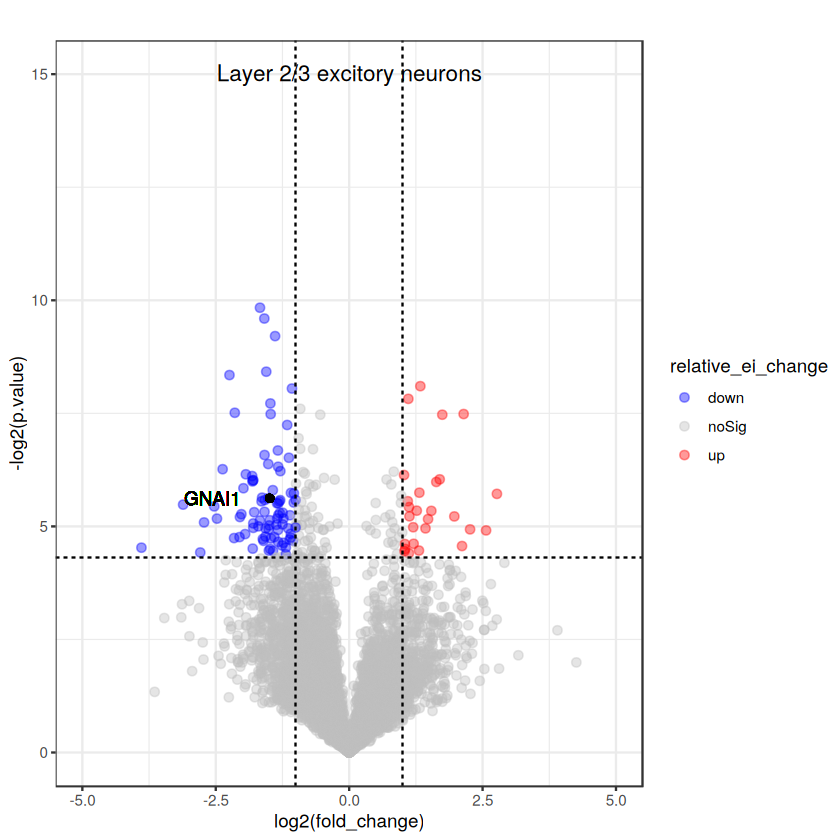

In [77]:
p1

In [134]:
p_lst1 <- list()
p_lst1[[1]] <- p1
p_lst1[[2]] <- p2
p_lst1[[3]] <- p3
p_lst1[[4]] <- p4
p_lst1[[5]] <- p5
p_lst1[[6]] <- p6

In [135]:
pdf('/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/asd_ctr_ei_change.pdf',height = 10,width=17)
do.call("ggarrange", c(p_lst1, ncol=3, nrow=2))
dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


png 
  2

In [82]:
#####检查正态分布、方差齐性、样本数量
test_shapiro <- function(x){
    p_val <- shapiro.test(as.numeric(x[4:6]))$p.value
    return(p_val)
}
get_all_shapiro <- function(x){
    if(x[1] > 0.05 & x[2] > 0.05){
        flag <- 1
    }else{
        flag <- 0
    }
    return(flag)
}
test_bartlett <- function(x){
    tmp_dat <- cbind(as.numeric(x),rep(c("asd","ctr"),each=3))
    colnames(tmp_dat) <- c("EI","grp")
    p_val <- bartlett.test(EI~grp, tmp_dat)$p.value

    return(p_val)
}


In [81]:
all_shapiro_asd <- apply(ei_data,1,test_shapiro)

all_shapiro_ctr <- apply(ei_data,1,test_shapiro)
shapiro_asd_ctr <- as.data.frame(cbind(all_shapiro_asd,all_shapiro_ctr))
shapiro_flags <- apply(shapiro_asd_ctr,1,get_all_shapiro)
table(shapiro_flags)

#方差齐性分布检验
Bartlett_test_data <- apply(ei_data,1,test_bartlett)
table(Bartlett_test_data > 0.05)

In [64]:
shapiro.test(as.numeric(ei_data[1,1:3]*10^4))


	Shapiro-Wilk normality test

data:  as.numeric(ei_data[1, 1:3] * 10^4)
W = 0.98993, p-value = 0.808


In [24]:
res1 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L2_3_down.txt")$x
res2 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L4_down.txt")$x
res3 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L5_6_down.txt")$x
res4 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L5_6_CC_down.txt")$x
res5 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/Olig_down.txt")$x
res6 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/IN_VIP_down.txt")$x

In [27]:
up1 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L2_3_up.txt")$x
up2 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L4_up.txt")$x
up3 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L5_6_up.txt")$x
up4 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/L5_6_CC_up.txt")$x
up5 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/Olig_up.txt")$x
up6 <- read.table("/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/IN_VIP_up.txt")$x

In [28]:
ei_up_genes <- c(up1,up2,up3,up4,up5,up6)
up_info <- c(rep("L2_3",48),rep("L4",16),rep("L5_6",9),rep("L5_6_CC",36),rep("Olig",9),rep("IN_VIP",17))
ei_down_genes <- c(res1,res2,res3,res4,res5,res6)
info <- c(rep("L2_3",139),rep("L4",79),rep("L5_6",16),rep("L5_6_CC",34),rep("Olig",48),rep("IN_VIP",82))

In [33]:
table(rep(c("down","up"),c(398,135)))


down   up 
 398  135 

In [34]:
ei_change_genes_wzInfo <- cbind(c(ei_down_genes,ei_up_genes),c(info,up_info),rep(c("down","up"),c(398,135)))

In [36]:
head(ei_change_genes_wzInfo)

RIT1,L2_3,down
LEO1,L2_3,down
ITGB1BP1,L2_3,down
RP11-463D19.1,L2_3,down
BRD4,L2_3,down
TMED4,L2_3,down


In [37]:
write.table(ei_change_genes_wzInfo,"/disk1/wenqing/tmp_data/ASD/asd_ctr_ei_change_genes/asd_ctr_ei_change_genes_wzInfo.txt",quote=F,row.names=F,col.names=F)

In [12]:
shared_genes <- get_shared_genes(gene_ei_L2_3)
ei_data <- get_ei_mtx(gene_ei_L2_3)
ei_wzSig <- apply(ei_data,1,get_de_gene_ei)
table(ei_wzSig < 0.05)
expr_change <- apply(ei_data,1,get_expr_change)
expr_change[ei_wzSig > 0.05] <- 'noSig'
table(expr_change)


FALSE  TRUE 
 8034   187 

expr_change
 down noSig    up 
  139  8034    48 

In [17]:
length(shared_genes)

[1] 8221